# Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from scipy.stats import pearsonr
import pylab

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

CRIM: This is the per capita crime rate by town
ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
INDUS: This is the proportion of non-retail business acres per town.
CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
NOX: This is the nitric oxides concentration (parts per 10 million)
RM: This is the average number of rooms per dwelling
AGE: This is the proportion of owner-occupied units built prior to 1940
DIS: This is the weighted distances to five Boston employment centers
RAD: This is the index of accessibility to radial highways
TAX: This is the full-value property-tax rate per 10,000 dollars
PTRATIO: This is the pupil-teacher ratio by town
B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
LSTAT: This is the percentage lower status of the population
MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?

Нормальное
Равномерное
Биноминальное
Бернулли
Геометрическое
Логнормальное

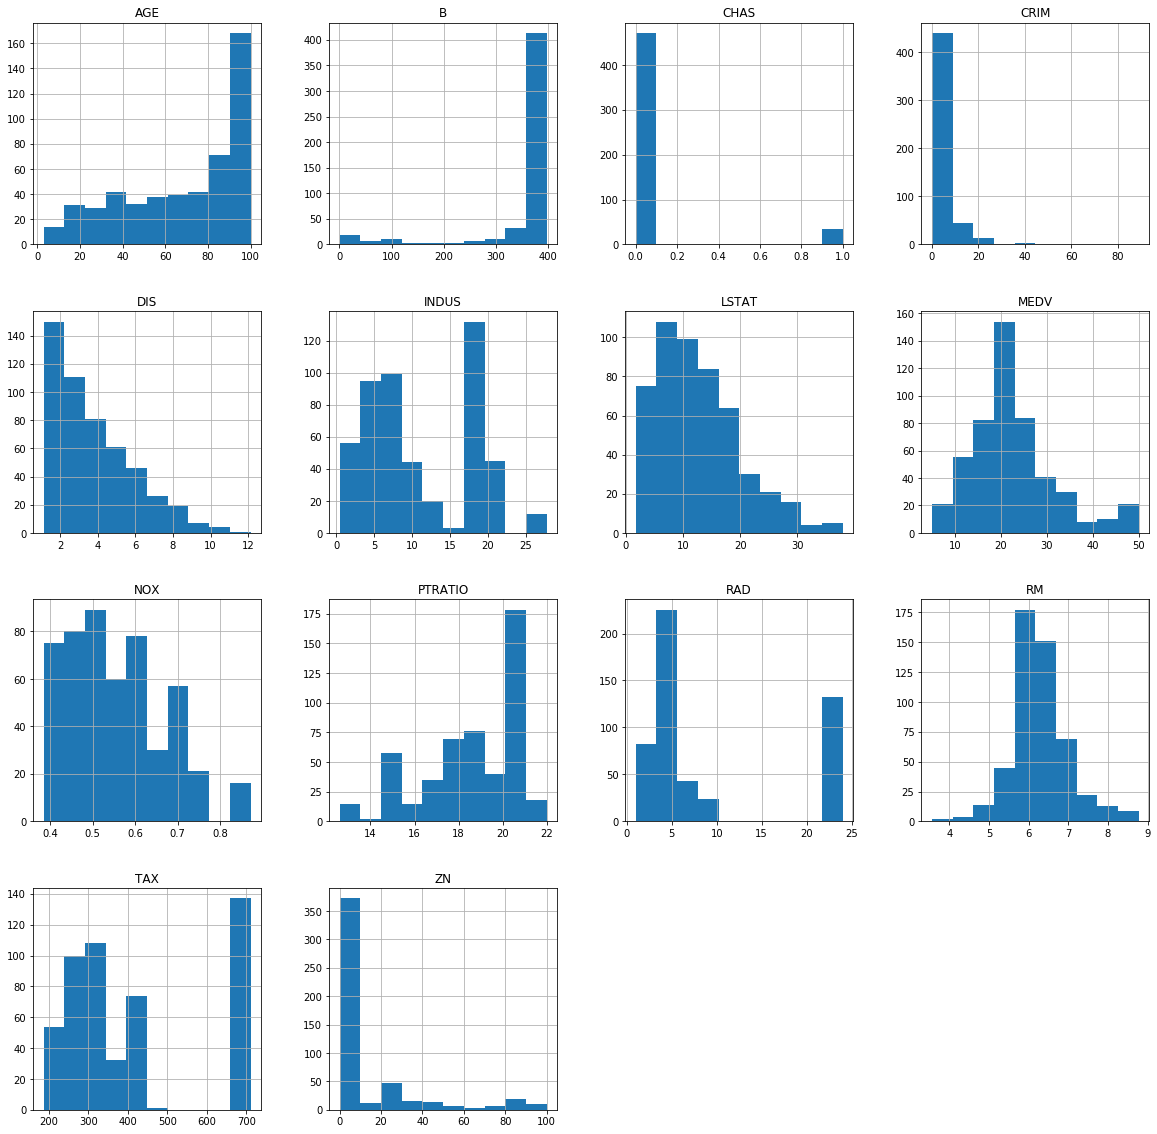

In [5]:
data.hist(figsize=(20,20))
plt.show()

Ответ:
Нормальное RM, MEDN
Биноминальное/Геометрическое PTRATIO, TAX
Бернулли CHAS
Геометрическое RAD
Логнормальное DIS, LSTAT, INDUS, NOX, AGE
Экспонециальное CRIM, ZN, B

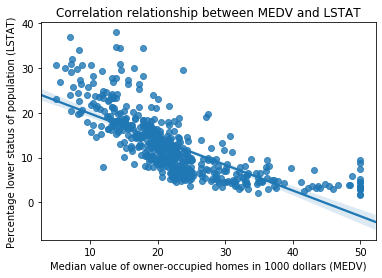

In [7]:
medv = data['MEDV']
lstat = data['LSTAT']
sns.regplot(x= medv, y=lstat, data=data, fit_reg=True)
plt.xlabel('Median value of owner-occupied homes in 1000 dollars (MEDV)')
plt.ylabel('Percentage lower status of population (LSTAT)')
plt.title('Correlation relationship between MEDV and LSTAT')
plt.grid(False)
plt.show()

Разделить данные на 80% тренировочных, 20% тестовых.
Составить модель линейной регрессии.
Посчитать ошибку модели на тестовых данных.
Сделать точечный график данных и полученной прямой линейной регрессии.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(
    np.array(medv).reshape(-1,1),
    np.array(lstat).reshape(-1,1),
    test_size = 0.2
)
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
model.score(X_test, y_test)

0.4255199389068902

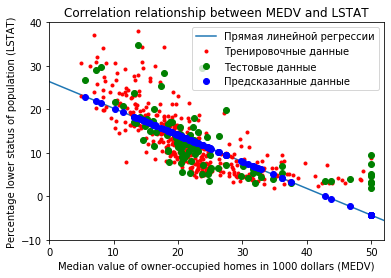

In [10]:
plt.xlabel('Median value of owner-occupied homes in 1000 dollars (MEDV)')
plt.ylabel('Percentage lower status of population (LSTAT)')
plt.title('Correlation relationship between MEDV and LSTAT')

x = np.linspace(0, 52, 102)

y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.plot(X_test, predicted_y, 'bo')
plt.xlim(0,52)
plt.ylim(-10,40)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные', 'Предсказанные данные'])
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно.

In [11]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [12]:
data.cov()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,2041.000000,1100.838710,995.928571,1061.207792,1657.428571,1108.090909,370.874150,1008.948052,1615.000000,1613.369128
SD of Ladder,1100.838710,2041.000000,173.694805,1259.805195,1219.519481,512.363636,506.897959,797.779221,1254.526490,1208.026846
Positive affect,995.928571,173.694805,2015.000000,785.240260,778.331169,1373.766234,405.292517,715.077922,586.120000,647.908897
Negative affect,1061.207792,1259.805195,785.240260,2015.000000,1253.103896,866.935065,309.231293,681.525974,1050.926667,944.803192
Social support,1657.428571,1219.519481,778.331169,1253.103896,2015.000000,904.538961,230.741497,891.500000,1509.293333,1471.919100
Freedom,1108.090909,512.363636,1373.766234,866.935065,904.538961,2015.000000,736.268707,987.331169,800.926667,821.386087
Corruption,370.874150,506.897959,405.292517,309.231293,230.741497,736.268707,1837.666667,511.333333,368.289773,233.044951
Generosity,1008.948052,797.779221,715.077922,681.525974,891.500000,987.331169,511.333333,2015.000000,949.020000,836.343869
Log of GDP\nper capita,1615.000000,1254.526490,586.120000,1050.926667,1509.293333,800.926667,368.289773,949.020000,1938.000000,1614.025970
Healthy life\nexpectancy,1613.369128,1208.026846,647.908897,944.803192,1471.919100,821.386087,233.044951,836.343869,1614.025970,1887.500000


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [13]:
import re
print("ОТВЕТ - ", sum(data.isnull().sum()), " отсутствующих значений")
print("          по столбцам:")
{print(re.sub(r"[\s]+", " ", k)," - ",v if v else "нет"," отсутствующих значений") for k,v in dict(data.isnull().sum()).items()}

ОТВЕТ -  23  отсутствующих значений
          по столбцам:
Country (region)  -  нет  отсутствующих значений
Ladder  -  нет  отсутствующих значений
SD of Ladder  -  нет  отсутствующих значений
Positive affect  -  1  отсутствующих значений
Negative affect  -  1  отсутствующих значений
Social support  -  1  отсутствующих значений
Freedom  -  1  отсутствующих значений
Corruption  -  8  отсутствующих значений
Generosity  -  1  отсутствующих значений
Log of GDP per capita  -  4  отсутствующих значений
Healthy life expectancy  -  6  отсутствующих значений


{None}

Сколько стран в выборке? Написать ответ.

In [14]:
print(f"ОТВЕТ:\nВ выборке {len(data['Country (region)'].unique())} стран")

ОТВЕТ:
В выборке 156 стран


Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [15]:
X = data.iloc[:,1:11]
np.round_(X.corr(), decimals=2)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.00,0.54,0.49,0.52,0.82,0.55,0.19,0.50,0.81,0.82
SD of Ladder,0.54,1.00,0.09,0.62,0.60,0.25,0.26,0.39,0.63,0.61
Positive affect,0.49,0.09,1.00,0.39,0.39,0.68,0.21,0.35,0.30,0.33
Negative affect,0.52,0.62,0.39,1.00,0.62,0.43,0.16,0.34,0.54,0.49
Social support,0.82,0.60,0.39,0.62,1.00,0.45,0.12,0.44,0.77,0.74
Freedom,0.55,0.25,0.68,0.43,0.45,1.00,0.38,0.49,0.41,0.42
Corruption,0.19,0.26,0.21,0.16,0.12,0.38,1.00,0.27,0.20,0.12
Generosity,0.50,0.39,0.35,0.34,0.44,0.49,0.27,1.00,0.48,0.43
Log of GDP\nper capita,0.81,0.63,0.30,0.54,0.77,0.41,0.20,0.48,1.00,0.85
Healthy life\nexpectancy,0.82,0.61,0.33,0.49,0.74,0.42,0.12,0.43,0.85,1.00


In [16]:
X.corr().style.background_gradient(cmap='RdYlGn').set_precision(2)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1,0.54,0.49,0.52,0.82,0.55,0.19,0.5,0.81,0.82
SD of Ladder,0.54,1,0.085,0.62,0.6,0.25,0.26,0.39,0.63,0.61
Positive affect,0.49,0.085,1,0.39,0.39,0.68,0.21,0.35,0.3,0.33
Negative affect,0.52,0.62,0.39,1,0.62,0.43,0.16,0.34,0.54,0.49
Social support,0.82,0.6,0.39,0.62,1,0.45,0.12,0.44,0.77,0.74
Freedom,0.55,0.25,0.68,0.43,0.45,1,0.38,0.49,0.41,0.42
Corruption,0.19,0.26,0.21,0.16,0.12,0.38,1,0.27,0.2,0.12
Generosity,0.5,0.39,0.35,0.34,0.44,0.49,0.27,1,0.48,0.43
Log of GDP per capita,0.81,0.63,0.3,0.54,0.77,0.41,0.2,0.48,1,0.85
Healthy life expectancy,0.82,0.61,0.33,0.49,0.74,0.42,0.12,0.43,0.85,1


«ВВП на душу населения», «Социальная поддержка» и «Ожидаемая продолжительность жизни» имеют сильную положительную корреляцию, как и «Удовлетворенность жизнью», т.е. в странах с высоким ВВП на душу населения и хорошей социальной поддержкой население более здоровое и довольное.

«Щедрость», «Свобода» и «Коррупция» имеют низкую корреляцию в сравнении с остальными метриками, как и позитивные / негативные эмоции, т.е. нет значительной связи между этими показателями и остальными. Связь имеют «Свобода» и «Позитивные».

# Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

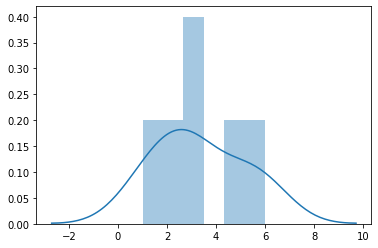

In [17]:
sample = np.random.randint(low=1, high=7, size=6)
sns.distplot(sample,bins=6)

ОТВЕТ: равномерное распределение.

Если увеличить количество подбрасываний, это становится очевидно (ниже):

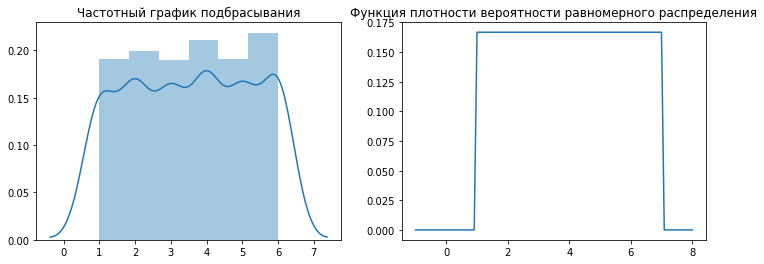

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sample = np.random.randint(1, 7, size=1000)
sns.distplot(sample, ax=axs[0], bins=6)
axs[0].set_title('Частотный график подбрасывания')

rv_uniform = stats.uniform(1, 6)
X = np.linspace(1 - 2, 6 + 2, 100)
pdf = rv_uniform.pdf(X)
axs[1] = plt.plot(X, pdf)
plt.title('Функция плотности вероятности равномерного распределения')

plt.show()

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

In [19]:
sample = [sum(np.random.randint(1, 7, size=100)) for i in range(1000)]
sample[:10]

[354, 349, 371, 353, 360, 342, 350, 361, 344, 352]

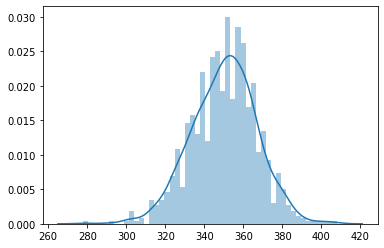

In [20]:
sns.distplot(sample,bins=50)
plt.show()

Ответ: нормальное распределение.